# Classification Problem

In [21]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns. set()
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv(r'Data\diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
ls= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' ]
for i in ls:
    df[i]=pd.to_numeric(df[i], errors='coerce')
    df[i] = np.where(df[i]==0, df[i].mean(), df[i])


In [26]:
df.shape

(768, 9)

In [27]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [28]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]


In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_sc= sc.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=101 )

In [31]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


Building Deep Neural Network- Multilayer Perceptron
Neuron : Hidden layer

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [33]:
dnn= Sequential()
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(1, activation='sigmoid'))
dnn.compile(optimizer = "adam", loss= 'binary_crossentropy', metrics=['accuracy'])
dnn.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3438 - loss: 0.9008 - val_accuracy: 0.4221 - val_loss: 0.7161
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4960 - loss: 0.7048 - val_accuracy: 0.7338 - val_loss: 0.6038
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7008 - loss: 0.6173 - val_accuracy: 0.7727 - val_loss: 0.5379
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7443 - loss: 0.5446 - val_accuracy: 0.7987 - val_loss: 0.4977
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.5303 - val_accuracy: 0.7662 - val_loss: 0.4752
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7804 - loss: 0.4843 - val_accuracy: 0.7857 - val_loss: 0.4575
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7733 - loss: 0.4677 - val_accuracy: 0.7792 - val_loss: 0.4526
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7726 - loss: 0.4655 - val_accuracy: 0.7857 - 

# Deep Neural Network

In [34]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense 


In [35]:
df= pd.read_csv("Data\Social_Network_Ads.csv")
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [36]:
df = df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

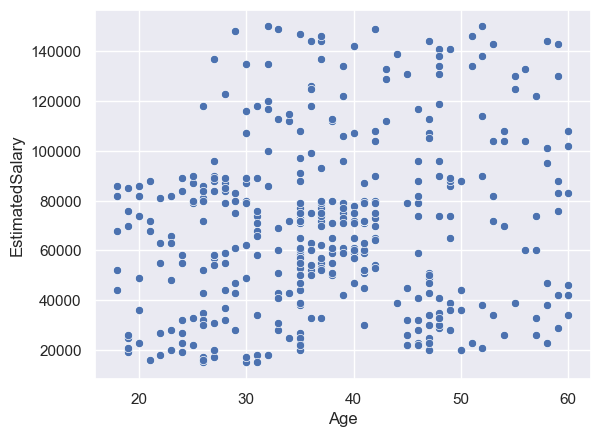

In [37]:
sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1] )

In [38]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [39]:
x.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [41]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [42]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Build DNN/MLP With out feature scaling

In [44]:
from keras.layers import BatchNormalization
model= Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
# model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5186 - loss: 1382.7565 - val_accuracy: 0.6750 - val_loss: 698.0267
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5953 - loss: 593.0690 - val_accuracy: 0.3250 - val_loss: 100.7743
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4928 - loss: 85.1371 - val_accuracy: 0.6750 - val_loss: 121.0627
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4333 - loss: 76.6189 - val_accuracy: 0.6750 - val_loss: 9.1243
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5269 - loss: 21.7929 - val_accuracy: 0.6750 - val_loss: 48.9666
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5779 - loss: 57.0125 - val_accuracy: 0.6750 - val_loss: 16.7408
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4823 - loss: 46.8775 - val_accuracy: 0.6750 - val_loss: 3.8429
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5427 - loss: 24.5343 - val_

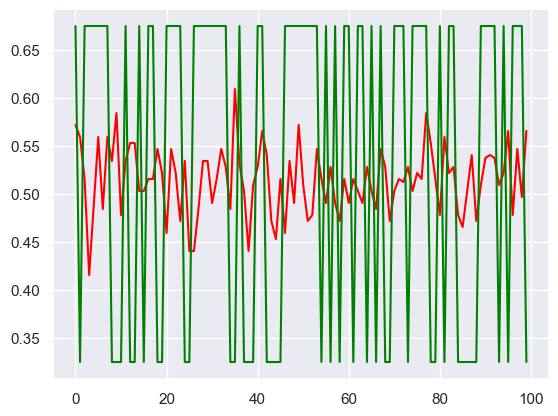

In [46]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')

In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.fit_transform(x_test)

In [48]:
history1 = model.fit(x_train_sc, y_train, epochs=100, validation_data=(x_test_sc, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6502 - loss: 0.6611 - val_accuracy: 0.6750 - val_loss: 0.5526
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6321 - loss: 0.5828 - val_accuracy: 0.7375 - val_loss: 0.4507
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 0.4725 - val_accuracy: 0.8375 - val_loss: 0.3723
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7798 - loss: 0.4091 - val_accuracy: 0.8750 - val_loss: 0.3211
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8418 - loss: 0.3616 - val_accuracy: 0.8875 - val_loss: 0.2943
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8423 - loss: 0.3436 - val_accuracy: 0.8875 - val_loss: 0.2818
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8870 - loss: 0.3119 - val_accuracy: 0.9000 - val_loss: 0.2723
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8809 - loss: 0.2770 - val_accuracy: 0.8750 - 

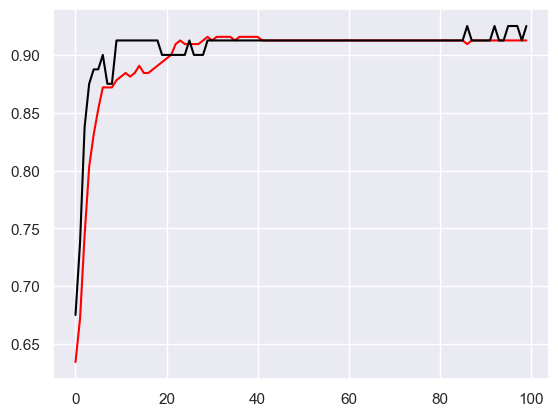

In [49]:
plt.plot(history1.history['accuracy'], color='red')
plt.plot(history1.history['val_accuracy'], color='black')

# Early Stoping - can handle overfitting

In [50]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#dummy data
# from sklearn.datasets import make_circles


In [51]:
# x, y = make_circles(n_samples=100, noise=0.2, random_state=101)

In [52]:
# x[:,1]

In [53]:
# sns.scatterplot(x= x[:,0], y=x[:,1], hue=y)

In [54]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [55]:
model = Sequential()
model.add(Dense(256, activation= 'relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
import time
start= time.time()
history = model.fit(x_train_sc, y_train, epochs=3500, validation_data= (x_test_sc, y_test))
print(time.time()-start)

Epoch 1/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6560 - loss: 3.0436 - val_accuracy: 0.6750 - val_loss: 2.1587
Epoch 2/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6403 - loss: 2.0464 - val_accuracy: 0.7125 - val_loss: 0.7747
Epoch 3/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7448 - loss: 0.7021 - val_accuracy: 0.8250 - val_loss: 0.4032
Epoch 4/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7916 - loss: 0.4619 - val_accuracy: 0.8875 - val_loss: 0.3248
Epoch 5/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8866 - loss: 0.3161 - val_accuracy: 0.9000 - val_loss: 0.2304
Epoch 6/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8628 - loss: 0.3070 - val_accuracy: 0.8875 - val_loss: 0.2231
Epoch 7/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8784 - loss: 0.3078 - val_accuracy: 0.9125 - val_loss: 0.2242
Epoch 8/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9107 - loss: 0.2452 - val_accuracy: 0

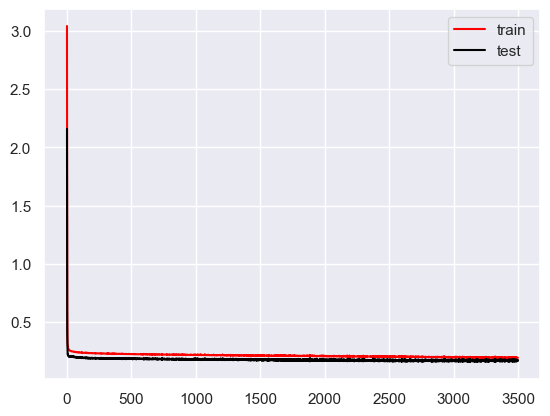

In [67]:
plt.plot(history.history['loss'], color='red', label='train',)
plt.plot(history.history['val_loss'], color='black', label='test')
plt.legend()
plt.show()

# Using EarlyStopping Method

In [59]:
model1= Sequential()
model1.add(Dense(256, activation='relu', input_dim=2))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [61]:
#EarlyStoping
callback= EarlyStopping(monitor='val_loss', min_delta=0.001, patience=30, verbose=1)
start=time.time()
history1= model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test), callbacks=callback)
print(time.time()-start)

Epoch 1/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5009 - loss: 8.3664 - val_accuracy: 0.3250 - val_loss: 19.3215
Epoch 2/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4877 - loss: 16.5077 - val_accuracy: 0.6750 - val_loss: 8.7941
Epoch 3/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6299 - loss: 5.6082 - val_accuracy: 0.4750 - val_loss: 3.1848
Epoch 4/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5431 - loss: 8.7971 - val_accuracy: 0.8250 - val_loss: 0.4100
Epoch 5/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5316 - loss: 10.9844 - val_accuracy: 0.6750 - val_loss: 9.9297
Epoch 6/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5580 - loss: 14.2331 - val_accuracy: 0.6750 - val_loss: 5.0148
Epoch 7/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4973 - loss: 19.6927 - val_accuracy: 0.4125 - val_loss: 6.7377
Epoch 8/3500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4602 - loss: 7.3009 - val_accura

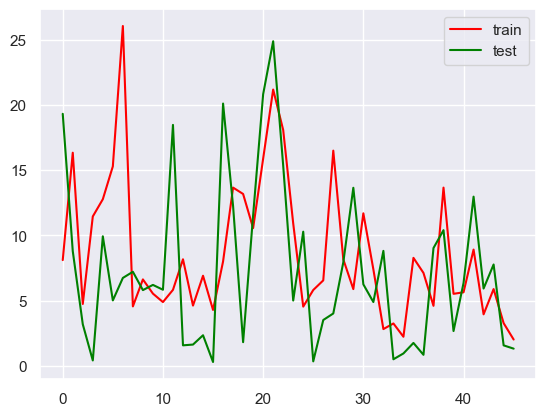

In [68]:
plt.plot(history1.history['loss'], color='red', label='train')
plt.plot(history1.history['val_loss'], color='green', label='test')
plt.legend()
plt.show()

# Gradient_Descent_optimisation_method

In [2]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df= pd.read_csv('Data/Social_Network_Ads.csv')
df= df.iloc[:,2:]
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [45]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [46]:
x.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_sc= sc.fit_transform(x)
x_sc

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.2, random_state=101)

In [50]:
print(x_train.shape, x_test.shape)

(320, 2) (80, 2)


In [51]:
model= Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='binary_crossentropy', metrics= ['accuracy'])

# Batch GD

In [53]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
start= time.time()
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8562 - val_loss: 0.2208 - val_accuracy: 0.9000
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.9000 - val_loss: 0.2459 - val_accuracy: 0.9125
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.9000 - val_loss: 0.2198 - val_accuracy: 0.9125
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.9062 - val_loss: 0.2446 - val_accuracy: 0.9250
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.9125 - val_loss: 0.2726 - val_accuracy: 0.9250
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.9094 - val_loss: 0.2329 - val_accuracy: 0.9250
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9125 - val_loss: 0.2699 - val_accuracy: 0.9125
Epoch 

# Mini Batch Gradient Decent

In [56]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.compile(loss='binary_crossentropy', metrics= ['accuracy'])

In [58]:
start= time.time()
history= model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=100)
print(time.time()-start)

Epoch 1/10
4/4 [==============================] - 1s 74ms/step - loss: 0.6417 - accuracy: 0.7344 - val_loss: 0.5343 - val_accuracy: 0.8125
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 0.5350 - accuracy: 0.8281 - val_loss: 0.4634 - val_accuracy: 0.8750
Epoch 3/10
4/4 [==============================] - 0s 16ms/step - loss: 0.4815 - accuracy: 0.8469 - val_loss: 0.4166 - val_accuracy: 0.8750
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 0.4401 - accuracy: 0.8625 - val_loss: 0.3812 - val_accuracy: 0.8625
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.4097 - accuracy: 0.8562 - val_loss: 0.3510 - val_accuracy: 0.8625
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 0.3809 - accuracy: 0.8719 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 0.3592 - accuracy: 0.8875 - val_loss: 0.3090 - val_accuracy: 0.8750
Epoch 8/10
4/4 [===========

# Exponentially Weighted Moving Average

In [59]:
# It means that we will calculate the value of moving average points( 10 days for more stable : beta=0.9).

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [61]:
df= pd.read_csv('DailyDelhiClimate.csv')
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [62]:
df= df[['date', 'meantemp']]
df.head()

date   meantemp
0  2017-01-01  15.913043
1  2017-01-02  18.500000
2  2017-01-03  17.111111
3  2017-01-04  18.700000
4  2017-01-05  18.388889

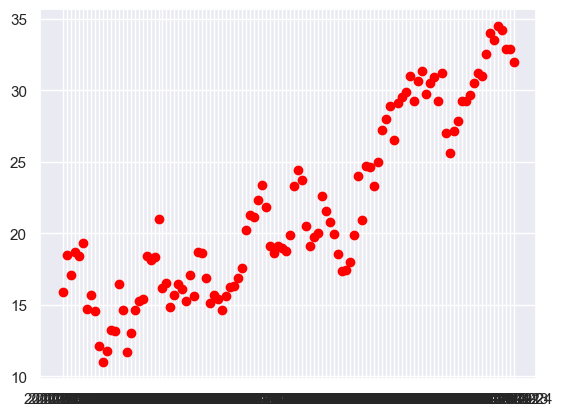

In [63]:
plt.scatter(df['date'], df['meantemp'], color= 'red')
plt.show()

In [64]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()
x2 = df['meantemp'].ewm(alpha=0.5).mean()
x3 = df['meantemp'].ewm(alpha=0.2).mean()
x4 = df['meantemp'].ewm(alpha=0.98).mean()

In [65]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

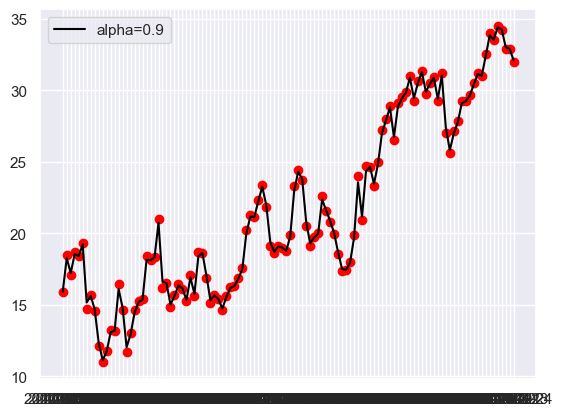

In [66]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black', label='alpha=0.9')
plt.legend()
plt.show()

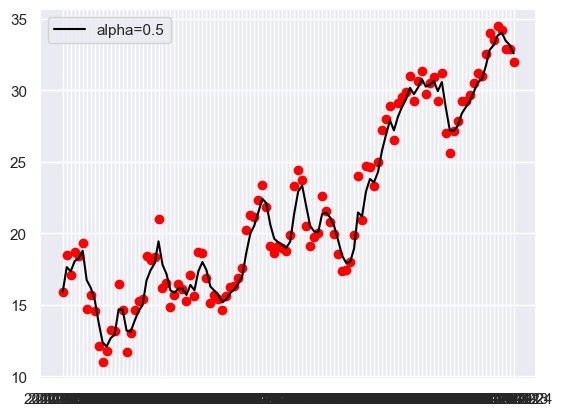

In [67]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x2, color='black', label='alpha=0.5')
plt.legend()
plt.show()

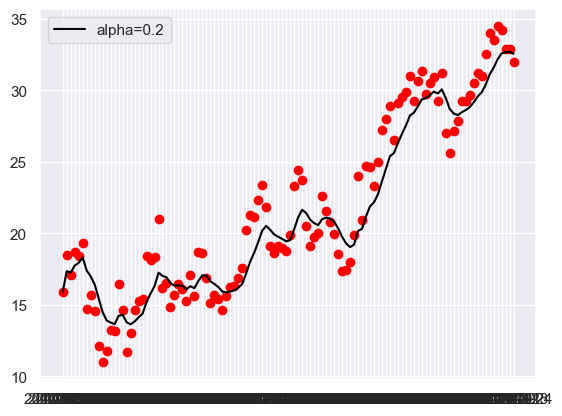

In [68]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x3, color='black', label='alpha=0.2')
plt.legend()
plt.show()

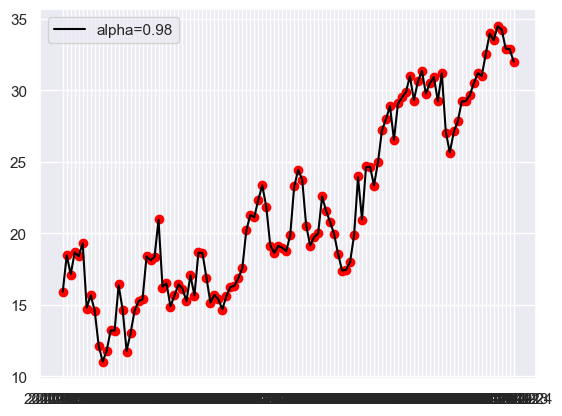

In [69]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x4, color='black', label='alpha=0.98')
plt.legend()
plt.show()

# All Optimization Method Together

In [70]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import *
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [71]:
x_train= x_train.reshape(x_train.shape[0], 28,28,1)
x_test= x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)
y_train= keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
# Normalization
x_train = x_train/255.0
x_test = x_test /255.0

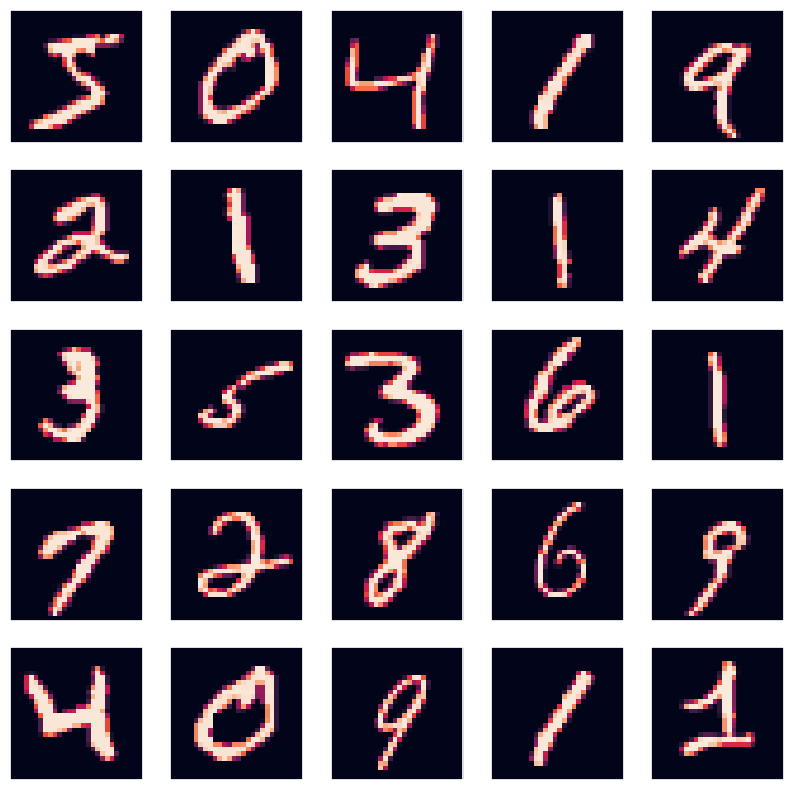

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

In [73]:
def build_model (optimizer):
    model= Sequential()
    model.add(Flatten())
    model.add(Dense(256, activation='relu', input_shape= input_shape))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    return model

In [74]:
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop','Adam']
for i in optimizers:
    model= build_model(i)
    print(i)
    history= model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), verbose=1)

SGD
Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 1.1093 - accuracy: 0.6564 - val_loss: 0.4303 - val_accuracy: 0.8866
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.5264 - accuracy: 0.8426 - val_loss: 0.3229 - val_accuracy: 0.9076
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4273 - accuracy: 0.8727 - val_loss: 0.2791 - val_accuracy: 0.9181
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3733 - accuracy: 0.8905 - val_loss: 0.2485 - val_accuracy: 0.9254
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3327 - accuracy: 0.9025 - val_loss: 0.2261 - val_accuracy: 0.9319
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3046 - accuracy: 0.9113 - val_loss: 0.2080 - val_accuracy: 0.9372
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2823 - accuracy: 0.9179 - val_loss: 0.1924 - val_accuracy: 0.9430
Ep

# Image Processing with deep neural network

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0


In [76]:
# Import fassion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\ardra\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [77]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [78]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [79]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

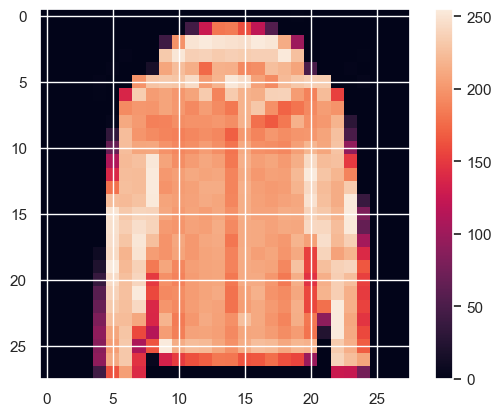

In [80]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(True)
plt.show()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

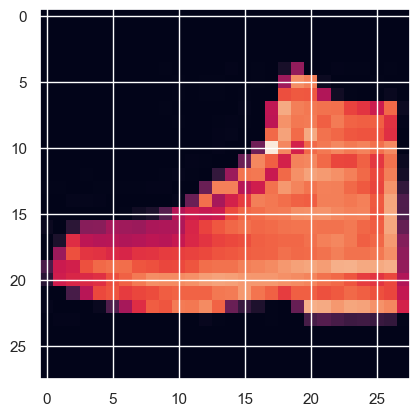

In [81]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar

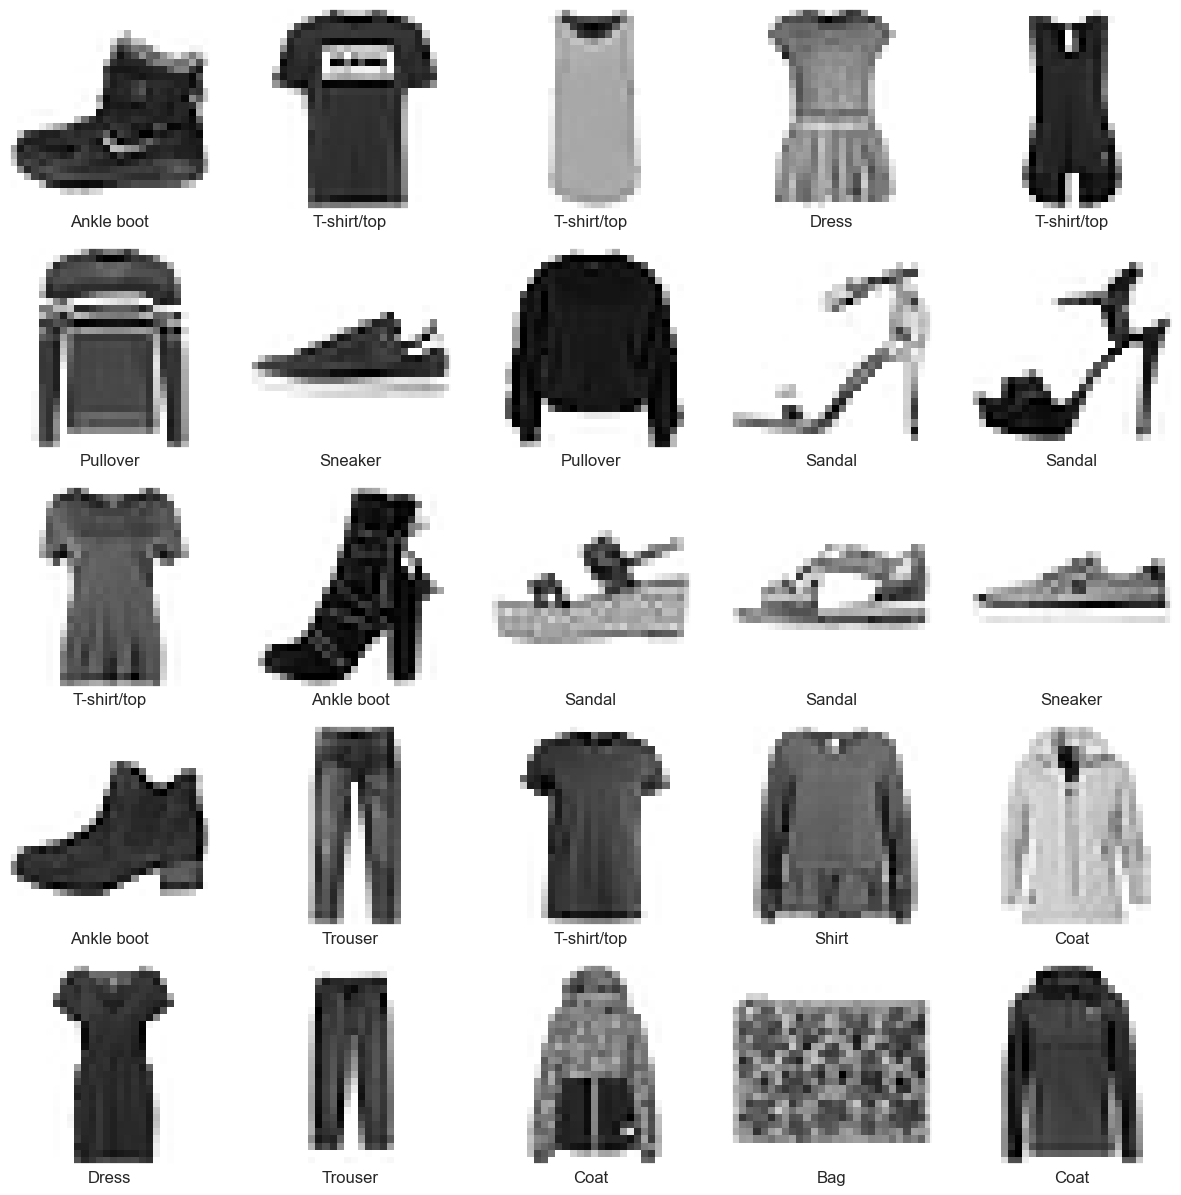

In [84]:
plt.figure(figsize= (15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

# Multilayer perceptron model -DNN

In [85]:
from keras import Sequential
from keras.layers import *
model= keras.Sequential([keras.layers.Flatten (input_shape=(28,28)),
                         keras.layers.Dense(128, activation= 'relu'),
                         keras.layers.Dense(10, activation= 'softmax')])

In [86]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.compile(optimizer='adam', loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )

# Tensor Board - DNN Visualization (just like matplot)

In [89]:
import os
import datetime
logdir= os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
print(logdir)

logs\20231025-211310


In [90]:
%load_ext tensorboard
%tensorboard --logdir $logdir

In [91]:
tensorboard_callback= keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [93]:
history= model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images,test_labels),
                  callbacks= [tensorboard_callback])

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 4.3035 - accuracy: 0.7052 - val_loss: 0.9422 - val_accuracy: 0.7051
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.7022 - accuracy: 0.7637 - val_loss: 0.6709 - val_accuracy: 0.7771
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5671 - accuracy: 0.8056 - val_loss: 0.5669 - val_accuracy: 0.8067
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4921 - accuracy: 0.8246 - val_loss: 0.6043 - val_accuracy: 0.7814
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4670 - accuracy: 0.8363 - val_loss: 0.5125 - val_accuracy: 0.8259
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4484 - accuracy: 0.8415 - val_loss: 0.5262 - val_accuracy: 0.8217
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4442 - accuracy: 0.8440 - val_loss: 0.5360 - val_accuracy: 0.8174
Epoch 

# Hypper Paramter Turning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv('diabetes.csv')
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.describe(include='all').T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [4]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [5]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [6]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc_x= sc.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, random_state=1)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
model= Sequential()
model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_dim=8))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size= 32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 12.1795 - accuracy: 0.4707 - val_loss: 5.3840 - val_accuracy: 0.5195
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 9.3269 - accuracy: 0.5326 - val_loss: 3.3629 - val_accuracy: 0.5455
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 7.9457 - accuracy: 0.5342 - val_loss: 2.5219 - val_accuracy: 0.5584
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 7.5985 - accuracy: 0.5147 - val_loss: 1.9521 - val_accuracy: 0.5714
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 6.4526 - accuracy: 0.5016 - val_loss: 1.7340 - val_accuracy: 0.6623
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 5.8696 - accuracy: 0.5358 - val_loss: 1.5394 - val_accuracy: 0.6558
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 4.9708 - accuracy: 0.5879 - val_loss: 1.3120 - val_accuracy: 0.6883
Epoch 8/100

Epoch 59/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.6678 - val_loss: 0.8229 - val_accuracy: 0.6623
Epoch 60/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6889 - val_loss: 0.8205 - val_accuracy: 0.6623
Epoch 61/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.6857 - val_loss: 0.8237 - val_accuracy: 0.6558
Epoch 62/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.6873 - val_loss: 0.8214 - val_accuracy: 0.6623
Epoch 63/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.6710 - val_loss: 0.8285 - val_accuracy: 0.6429
Epoch 64/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.6906 - val_loss: 0.8162 - val_accuracy: 0.6623
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.6889 - val_loss: 0.8166 - val_accuracy: 0.6364
Epoch 

# Hyper Parameter 
case 1 : how to select appropriate optimizer

In [10]:
! pip install -U keras-tuner

In [11]:
!pip install pyqt5

In [12]:
import keras_tuner as kt

Using TensorFlow backend


In [13]:
def build_model(hp):
    model= Sequential()
    model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_dim=8))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    optimizer= hp.Choice('optimizer', values=['adam','rmspob','adagrd','adadelta','sgd'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# Best optimizer
tuner= kt.RandomSearch(build_model, objective='val_loss', max_trials= 5)
tuner.search(x_train, y_train, epochs=5, validation_data= (x_test, y_test))

Reloading Tuner from .\untitled_project\tuner0.json


In [15]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [16]:
model= tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs= 100, batch_size=32, initial_epoch=5, validation_data=(x_test, y_test))

Epoch 6/100
20/20 [==============================] - 1s 15ms/step - loss: 2.3844 - accuracy: 0.5700 - val_loss: 1.1114 - val_accuracy: 0.6234
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 2.3921 - accuracy: 0.5277 - val_loss: 1.0338 - val_accuracy: 0.6234
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 2.1654 - accuracy: 0.5391 - val_loss: 0.9281 - val_accuracy: 0.6169
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 1.6989 - accuracy: 0.5668 - val_loss: 0.9159 - val_accuracy: 0.6364
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 1.5642 - accuracy: 0.5863 - val_loss: 0.9178 - val_accuracy: 0.5779
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 1.2975 - accuracy: 0.5977 - val_loss: 0.9048 - val_accuracy: 0.6234
Epoch 12/100
20/20 [==============================] - 0s 5ms/step - loss: 1.3100 - accuracy: 0.5749 - val_loss: 0.9063 - val_accuracy: 0.5974
Epoch 13/

Epoch 64/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6808 - val_loss: 0.7283 - val_accuracy: 0.6753
Epoch 65/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7020 - val_loss: 0.7252 - val_accuracy: 0.6948
Epoch 66/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.7020 - val_loss: 0.7219 - val_accuracy: 0.6948
Epoch 67/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.6938 - val_loss: 0.7229 - val_accuracy: 0.6883
Epoch 68/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6228 - accuracy: 0.6824 - val_loss: 0.7296 - val_accuracy: 0.6948
Epoch 69/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6938 - val_loss: 0.7284 - val_accuracy: 0.6688
Epoch 70/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6105 - accuracy: 0.7264 - val_loss: 0.7229 - val_accuracy: 0.6883
Epoch 

# All hypper parameter at one go

In [22]:
def build_model(hp):
    model= Sequential()
    counter= 0
    for i in range(hp.Int('no_hid_layer', min_value=1, max_value=10)):
        if counter==0:
            model.add(Dense(hp.Int('units'+ str(i), min_value=8, max_value=128, step=8),
                           activation=hp.Choice('activation'+str(i), values=['relu', 'leaky_relu', 'tanh', 
                                                                             'sigmoid', 'linear', 'softmax','elu','selu']),
                     input_dim=8))
            model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.1,0.2,0.3,0.4,0.5])))
        else:
            model.add(Dense(hp.Int('units'+str(i), min_values=8, max_values=128, step=8),
                           activation=hp.Choice('activation' + str(i), values=['relu', 'leaky_relu', 'tanh', 'sigmoid', 
                                                                               'linear', 'softmax', 'elu', 'selu']),
                                               input_dim=8))
        model.add(Dropout(hp.Choice('dropout'+ str(i), values= [0.1,0.2,0.3,0.4,0.5])))
    counter+1
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adagrad', 'adam', 'adadelta', 'sgd']),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model
# Best Optimiser
tuner= kt.RandomSearch(build_model, objective= 'val_loss', max_trials=5, directory= 'my_own_dir', project_name='HyperParam')
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))  

Trial 5 Complete [00h 00m 04s]
val_loss: 0.8166517615318298

Best val_loss So Far: 0.6522206664085388
Total elapsed time: 00h 00m 17s


In [24]:
tuner.get_best_hyperparameters()[0].values

{'no_hid_layer': 6,
 'units0': 112,
 'activation0': 'tanh',
 'dropout0': 0.1,
 'optimizer': 'adam',
 'units1': 16,
 'activation1': 'softmax',
 'dropout1': 0.1,
 'units2': 128,
 'activation2': 'leaky_relu',
 'dropout2': 0.3,
 'units3': 64,
 'activation3': 'softmax',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'sigmoid',
 'dropout4': 0.5,
 'units5': 120,
 'activation5': 'sigmoid',
 'dropout5': 0.5}

In [25]:
model= tuner.get_best_models(num_models=1)[0]

In [29]:
model.fit(x_train, y_train, batch_size=32, epochs=100, initial_epoch=5, validation_data= (x_test, y_test))

Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.7528 - accuracy: 0.5651 - val_loss: 0.6547 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7617 - accuracy: 0.5570 - val_loss: 0.6534 - val_accuracy: 0.6429
Epoch 8/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7124 - accuracy: 0.6156 - val_loss: 0.6531 - val_accuracy: 0.6429
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6967 - accuracy: 0.6059 - val_loss: 0.6535 - val_accuracy: 0.6429
Epoch 10/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7098 - accuracy: 0.6075 - val_loss: 0.6543 - val_accuracy: 0.6429
Epoch 11/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7215 - accuracy: 0.5977 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 12/100
20/20 [==============================] - 0s 9ms/step - loss: 0.7125 - accuracy: 0.6026 - val_loss: 0.6524 - val_accuracy: 0.6429
Epoch 13/

Epoch 64/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6580 - accuracy: 0.6531 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 65/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.6515 - val_loss: 0.6521 - val_accuracy: 0.6429
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6508 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 67/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6542 - accuracy: 0.6531 - val_loss: 0.6518 - val_accuracy: 0.6429
Epoch 68/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6512 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 69/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6560 - accuracy: 0.6547 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 70/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6460 - accuracy: 0.6547 - val_loss: 0.6518 - val_accuracy: 0.6429
Epoch 

# Data Acquicition
### Extract text from pdf

In [32]:
import os
os.getcwd()

'C:\\Users\\ardra\\Desktop\\Data-science\\DL and NLP'

In [36]:
! pip install pdfminer.six

In [38]:
import re
from pdfminer.high_level import extract_pages, extract_text

In [40]:
for page_layout in extract_pages('Ardra-DS.pdf'):
    for element in page_layout:
        print(element)

<LTTextBoxHorizontal(0) 31.200,709.404,304.554,735.395 'ArdrA P Data Analyst, ML Engineer \n'>
<LTTextBoxHorizontal(1) 31.200,668.185,226.768,708.128 'Mob: 7591933235 / 8105829045 \nGmail: ardrapbabu@gmail.com \nlinkedIn: https://www.linkedin.com/in/ardrapbabu \nGit hub: https://github.com/ardranijesh \n'>
<LTTextBoxHorizontal(2) 31.200,622.044,93.529,636.058 'Summary: \n'>
<LTTextBoxHorizontal(3) 31.200,572.070,595.049,613.327 'A task-driven professional with 3+ years of experience in data analysis and well-versed knowledge in data \nvisualization and Machine learning capable of transferring data points to beneficial business insight. Have hands-on \nknowledge in SQL, Python and Tableau \n'>
<LTTextBoxHorizontal(4) 31.200,536.964,63.630,550.978 'Skills \n'>
<LTTextBoxHorizontal(5) 36.840,501.150,105.741,527.767 'Programming \nLanguage \n'>
<LTTextBoxHorizontal(6) 36.840,456.750,82.878,468.727 'Statistics \n'>
<LTTextBoxHorizontal(7) 36.840,280.470,81.950,307.087 'Machine \nLearning \n

<LTTextBoxHorizontal(0) 31.200,729.150,542.091,741.127 'Marketing Analyst (Team member data gathering) - Varal Consultancy DMCC (March 2023- April 2023) \n'>
<LTTextBoxHorizontal(1) 49.200,592.230,563.511,711.930 '\uf0b7  Analyze the company performance.  \n\uf0b7  Give a detailed analysis on Marketing Strategy 6.0 \n\uf0b7  Sign up and message sent analysis using power BI. \n\uf0b7 \nImplementation of new marketing strategy and do the analysis on the collected data. \n\uf0b7  Analyze the data given by marketing and operation team using python and power BI. \n\uf0b7  Doing the detailed analysis on the data given by sales marketing and other departments using python \n\uf0b7  Presenting the analysis report. \n\uf0b7  Google analytics and hot jar analysis to study about the customer behavior. \n'>
<LTTextBoxHorizontal(2) 31.200,548.310,599.217,574.927 'Engineer - Customer Support (Sales, Marketing, Purchase and Supply chain) Strategi Automation Solutions Pvt Ltd \n(Sep2021 -March 2023) \

In [42]:
text= extract_text('Ardra-DS.pdf')
print(text)

ArdrA P Data Analyst, ML Engineer 

Mob: 7591933235 / 8105829045 
Gmail: ardrapbabu@gmail.com 
linkedIn: https://www.linkedin.com/in/ardrapbabu 
Git hub: https://github.com/ardranijesh 

Summary: 

A task-driven professional with 3+ years of experience in data analysis and well-versed knowledge in data 
visualization and Machine learning capable of transferring data points to beneficial business insight. Have hands-on 
knowledge in SQL, Python and Tableau 

Skills 

Programming 
Language 

Statistics 

Machine 
Learning 

Cloud 
Platforms 

1. Python 
2. C 
3. R Programming 
4. SQL 
1. Descriptive statistics 
2. Inferential statistics 
3. Probability theory 
4. Hypothesis testing 
5. Regression analysis 
6. Experimental design 
7. Sampling theory 
8. Time series analysis 
9. Multivariate analysis. 
10. Anova, Ancova 
11. P-value, Z- score 
1. Regression: Linear Regression, 
Logistic Regression, Polynomial 
Regression, Ridge regression, Lasso 
Regression 
2. Classification: K-Nearest Ne

# Speech to text and text to speech

In [2]:
! pip install gTTS

In [5]:
from gtts import gTTS
paragraph= input('Enter the paragraph here')

Enter the paragraph hereRequirement already satisfied:


In [8]:
my_audio= gTTS(paragraph, lang='en')
my_audio.save('my_audio')

In [9]:
! pip install speechrecognition
! pip install pyaudio

In [11]:
rec= sr.Recognizer()
import speech_recognition as sr
with sr.Microphone() as source:
    print("Speak please to record your voice.....")
    text= rec.listen(source)

Speak please to record your voice.....


In [12]:
rec.recognize_google(text)

UnknownValueError: 

# nltk

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
editorial = "The pace of retail inflation slowed to a 25-month low of 4.25% in May, propelled largely by the elevated level of year-on-year price gains in May 2022, when the month’s print had exceeded 7%. Headline inflation extended its decelerating trend for a fourth month, in some measure validating the Reserve Bank of India (RBI)’s decision to pause monetary tightening till it could assess the impact of past interest rate increases. Still, month-on-month, the provisional Consumer Price Index (CPI) showed price gains at 0.51% in May, unchanged in pace from April’s six-month high sequential inflation reading. A key contributor to the deceleration in year-on-year price gains in May was the inflation in food items, which slowed by 93 basis points to 2.91%. Oils and fats contributed to the easing in food item prices, posting a 16% deflation. A continuing deflation in the cereals and products category, which has an almost 10% weight in the CPI, also helped. Cereals inflation eased by more than 100 basis points from April’s print to 12.7%. The risk of reading too much into the year-on-year moderation in inflation was, however, most evident in the food and beverages group that accounts for 46% of the CPI, with nine of its 12 sub-groups witnessing sequential increases in price levels.Crucial food items including vegetables and the key protein sources of milk, meat and pulses all posted appreciable quickening in prices from a month earlier. Vegetable prices, which deflated 8.2% from the year-earlier levels, logged 3.35% sequential inflation, a pace that was almost twice April’s 1.7% month-on-month gains. Milk and dairy, and pulses are the other food categories of concern. While year-on-year inflation in milk hovered close to the 9% level in May, sequentially too the reading was at a three-month high at 0.67%. Prices of pulses, the primary protein source in vegetarian consumers’ diets, have also been rising at a disconcerting clip, with the year-on-year rate quickening by 128 basis points to a 31-month high of 6.56%. Sequentially, the category that includes lentils such as tur and urad dal, posted 1.21% inflation. Acknowledging the sensitivity of dal prices, especially when key State elections are due, the Centre, on June 2, imposed limits on the holding of stocks of urad and tur till October 31. With households’ perception of current inflation found to be running at 8.8%, and three-month and year-ahead forecasts pegging price gains at more than 10% in the May round of the RBI’s inflation expectations survey, policymakers have their task cut out to convince consumers that inflation will be tamed so as to not erode their purchasing power and savings."

In [4]:
editorial

'The pace of retail inflation slowed to a 25-month low of 4.25% in May, propelled largely by the elevated level of year-on-year price gains in May 2022, when the month’s print had exceeded 7%. Headline inflation extended its decelerating trend for a fourth month, in some measure validating the Reserve Bank of India (RBI)’s decision to pause monetary tightening till it could assess the impact of past interest rate increases. Still, month-on-month, the provisional Consumer Price Index (CPI) showed price gains at 0.51% in May, unchanged in pace from April’s six-month high sequential inflation reading. A key contributor to the deceleration in year-on-year price gains in May was the inflation in food items, which slowed by 93 basis points to 2.91%. Oils and fats contributed to the easing in food item prices, posting a 16% deflation. A continuing deflation in the cereals and products category, which has an almost 10% weight in the CPI, also helped. Cereals inflation eased by more than 100 ba

In [5]:
# Tokenization

In [6]:
from nltk.tokenize import sent_tokenize ,  word_tokenize

In [7]:
sent_tokenize(editorial)

['The pace of retail inflation slowed to a 25-month low of 4.25% in May, propelled largely by the elevated level of year-on-year price gains in May 2022, when the month’s print had exceeded 7%.',
 'Headline inflation extended its decelerating trend for a fourth month, in some measure validating the Reserve Bank of India (RBI)’s decision to pause monetary tightening till it could assess the impact of past interest rate increases.',
 'Still, month-on-month, the provisional Consumer Price Index (CPI) showed price gains at 0.51% in May, unchanged in pace from April’s six-month high sequential inflation reading.',
 'A key contributor to the deceleration in year-on-year price gains in May was the inflation in food items, which slowed by 93 basis points to 2.91%.',
 'Oils and fats contributed to the easing in food item prices, posting a 16% deflation.',
 'A continuing deflation in the cereals and products category, which has an almost 10% weight in the CPI, also helped.',
 'Cereals inflation 

In [8]:
for sent in sent_tokenize(editorial):
    print(sent)

The pace of retail inflation slowed to a 25-month low of 4.25% in May, propelled largely by the elevated level of year-on-year price gains in May 2022, when the month’s print had exceeded 7%.
Headline inflation extended its decelerating trend for a fourth month, in some measure validating the Reserve Bank of India (RBI)’s decision to pause monetary tightening till it could assess the impact of past interest rate increases.
Still, month-on-month, the provisional Consumer Price Index (CPI) showed price gains at 0.51% in May, unchanged in pace from April’s six-month high sequential inflation reading.
A key contributor to the deceleration in year-on-year price gains in May was the inflation in food items, which slowed by 93 basis points to 2.91%.
Oils and fats contributed to the easing in food item prices, posting a 16% deflation.
A continuing deflation in the cereals and products category, which has an almost 10% weight in the CPI, also helped.
Cereals inflation eased by more than 100 bas

In [9]:
for word in word_tokenize(editorial):
    print(word)

The
pace
of
retail
inflation
slowed
to
a
25-month
low
of
4.25
%
in
May
,
propelled
largely
by
the
elevated
level
of
year-on-year
price
gains
in
May
2022
,
when
the
month
’
s
print
had
exceeded
7
%
.
Headline
inflation
extended
its
decelerating
trend
for
a
fourth
month
,
in
some
measure
validating
the
Reserve
Bank
of
India
(
RBI
)
’
s
decision
to
pause
monetary
tightening
till
it
could
assess
the
impact
of
past
interest
rate
increases
.
Still
,
month-on-month
,
the
provisional
Consumer
Price
Index
(
CPI
)
showed
price
gains
at
0.51
%
in
May
,
unchanged
in
pace
from
April
’
s
six-month
high
sequential
inflation
reading
.
A
key
contributor
to
the
deceleration
in
year-on-year
price
gains
in
May
was
the
inflation
in
food
items
,
which
slowed
by
93
basis
points
to
2.91
%
.
Oils
and
fats
contributed
to
the
easing
in
food
item
prices
,
posting
a
16
%
deflation
.
A
continuing
deflation
in
the
cereals
and
products
category
,
which
has
an
almost
10
%
weight
in
the
CPI
,
also
helped
.
Cereals
infl

In [10]:
white_space= nltk.tokenize.WhitespaceTokenizer()
for white in white_space.tokenize(editorial):
    print(white)

The
pace
of
retail
inflation
slowed
to
a
25-month
low
of
4.25%
in
May,
propelled
largely
by
the
elevated
level
of
year-on-year
price
gains
in
May
2022,
when
the
month’s
print
had
exceeded
7%.
Headline
inflation
extended
its
decelerating
trend
for
a
fourth
month,
in
some
measure
validating
the
Reserve
Bank
of
India
(RBI)’s
decision
to
pause
monetary
tightening
till
it
could
assess
the
impact
of
past
interest
rate
increases.
Still,
month-on-month,
the
provisional
Consumer
Price
Index
(CPI)
showed
price
gains
at
0.51%
in
May,
unchanged
in
pace
from
April’s
six-month
high
sequential
inflation
reading.
A
key
contributor
to
the
deceleration
in
year-on-year
price
gains
in
May
was
the
inflation
in
food
items,
which
slowed
by
93
basis
points
to
2.91%.
Oils
and
fats
contributed
to
the
easing
in
food
item
prices,
posting
a
16%
deflation.
A
continuing
deflation
in
the
cereals
and
products
category,
which
has
an
almost
10%
weight
in
the
CPI,
also
helped.
Cereals
inflation
eased
by
more
than
100
bas

In [11]:
from nltk.corpus import stopwords

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [18]:
from nltk.corpus import movie_reviews, product_reviews_1, product_reviews_2
movie_reviews.fileids()

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt',
 'neg/cv010_29063.txt',
 'neg/cv011_13044.txt',
 'neg/cv012_29411.txt',
 'neg/cv013_10494.txt',
 'neg/cv014_15600.txt',
 'neg/cv015_29356.txt',
 'neg/cv016_4348.txt',
 'neg/cv017_23487.txt',
 'neg/cv018_21672.txt',
 'neg/cv019_16117.txt',
 'neg/cv020_9234.txt',
 'neg/cv021_17313.txt',
 'neg/cv022_14227.txt',
 'neg/cv023_13847.txt',
 'neg/cv024_7033.txt',
 'neg/cv025_29825.txt',
 'neg/cv026_29229.txt',
 'neg/cv027_26270.txt',
 'neg/cv028_26964.txt',
 'neg/cv029_19943.txt',
 'neg/cv030_22893.txt',
 'neg/cv031_19540.txt',
 'neg/cv032_23718.txt',
 'neg/cv033_25680.txt',
 'neg/cv034_29446.txt',
 'neg/cv035_3343.txt',
 'neg/cv036_18385.txt',
 'neg/cv037_19798.txt',
 'neg/cv038_9781.txt',
 'neg/cv039_5963.txt',
 'neg/cv040_8829.txt',
 'neg/cv041_22364.txt',


In [20]:
movie_reviews.words('neg/cv017_23487.txt')

['so', 'what', 'do', 'you', 'get', 'when', 'you', ...]

In [22]:
complete_text= ' '.join(movie_reviews.words('neg/cv017_23487.txt'))
print(complete_text)

so what do you get when you mix together plot elements from various successful sci - fi films such as close encounters of the third kind , 2001 : a space odyssey , apollo 13 and contact ? well , whatever it is , you ' d sure as hell hope that it would be a thousand times better than this shoddy attempt at such a melange , considering the disastrous results we ' re left with here . this is a film that takes a little bit of everything , but ultimately adds up to a lot of nothing ! it ' s like i said . . . this movie sucks . plot : a rescue crew of astronauts is sent down to mars in the year 2020 , after an unknown energy force leads to a loss of contact with the previous gang of space aviators to visit the red planet . critique : extremely underwhelming is the best way to describe this movie . uneven , would be another . the trailer for this movie actually showed some promise , the buzz around it had been so - so , and even the film itself starts off with a decent first twenty minutes , 

In [24]:
product_reviews_2.fileids()

['Canon_PowerShot_SD500.txt',
 'Canon_S100.txt',
 'Diaper_Champ.txt',
 'Hitachi_router.txt',
 'Linksys_Router.txt',
 'MicroMP3.txt',
 'Nokia_6600.txt',
 'README.txt',
 'ipod.txt',
 'norton.txt']

In [25]:
product_reviews_1.words()

['repost', 'from', 'january', '13', ',', '2004', ...]

In [28]:
product_paragraph= ' '.join(product_reviews_2.words('Linksys_Router.txt'))
product_paragraph

'This router does everything that it is supposed to do , so i dont really know how to talk that bad about it . It was a very quick setup and installation , in fact the disc that it comes with pretty much makes sure you cant mess it up . By no means do you have to be a tech junkie to be able to install it , just be able to put a CD in the computer and it tells you what to do . It works great , i am usually at the full 54 mbps , although every now and then that drops to around 36 mbps only because i am 2 floors below where the router is . That only happens every so often , but its not that big of a drawback really , just a little slower than usual . It really is a great buy if you are lookin at having just one modem but many computers around the house . There are 3 computers in my house all getting wireless connection from this router , and everybody is happy with it . I do not really know why some people are tearing this router ! apart on their reviews , they are talking about installat

In [29]:
product_reviews_1.fileids()

['Apex_AD2600_Progressive_scan_DVD player.txt',
 'Canon_G3.txt',
 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt',
 'Nikon_coolpix_4300.txt',
 'Nokia_6610.txt',
 'README.txt']

In [35]:
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [36]:
word_stop= stopwords.words('english')

In [37]:
wcloud= WordCloud(max_words=100, stopwords=word_stop)
wcloud.generate(product_paragraph)

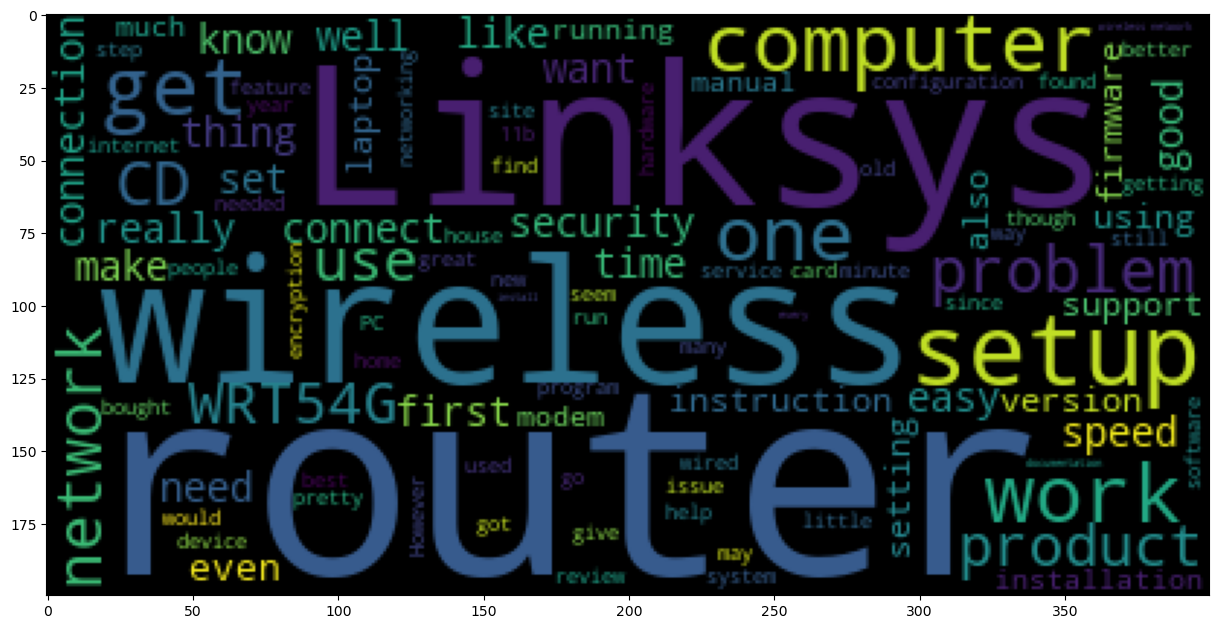

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(wcloud)
plt.show()

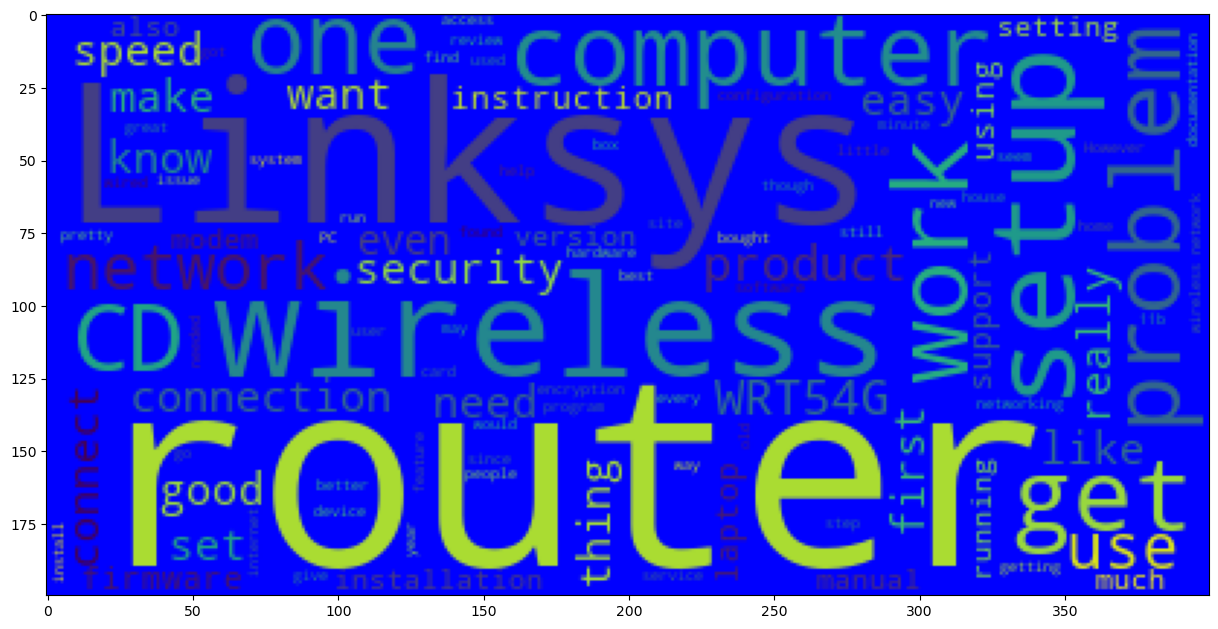

In [40]:
wcloud = WordCloud(max_words=100, stopwords=word_stop + ['time','many','well','phones','phone'],
                  background_color='blue')
wcloud.generate(product_paragraph)
import matplotlib
plt.figure(figsize=(15,10))
plt.imshow(wcloud)

In [42]:
! pip install textblob

     -------------------------------------- 636.8/636.8 kB 6.7 MB/s eta 0:00:00


In [43]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ardra\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [1]:
from textblob import TextBlob
from textblob import Word

In [2]:
text = TextBlob('法庭草图显示，在迈阿密法庭上，特朗普身着蓝色西装，两侧是他的律师克里斯基斯和托德布兰奇。美国前总统特朗普被指控在离开白宫后非法保存机密文件，成为历史上第一个被联邦刑事起诉的美国前任或在任总统。他面对37项罪名指控，包括对政府取回有关文件的行动进行阻碍，但他已向法庭否认控罪。特朗普已经进行过出庭程序，现在检控官在推动加快审讯。BBC华盛顿分部报道，特朗普出庭时面无表情，保持沉默，离开后即前往新泽西州一个高尔夫俱乐部向他的支持者讲话。')

In [4]:
english= text.translate(from_lang='zh-CN', to='en')

In [5]:
english.word_counts

defaultdict(int,
            {'the': 13,
             'sketch': 1,
             'of': 3,
             'court': 5,
             'showed': 1,
             'that': 2,
             'in': 6,
             'miami': 1,
             'trump': 4,
             'was': 2,
             'wearing': 1,
             'a': 2,
             'blue': 1,
             'suit': 1,
             'and': 4,
             'his': 2,
             'lawyer': 1,
             'chriskis': 1,
             'todbram': 1,
             'were': 1,
             'on': 1,
             'both': 1,
             'sides': 1,
             'former': 1,
             'us': 1,
             'president': 2,
             'accused': 1,
             'illegally': 1,
             'preserving': 1,
             'confidential': 1,
             'documents': 2,
             'after': 2,
             'leaving': 2,
             'white': 1,
             'house': 1,
             'becoming': 1,
             'first': 1,
             'predecessor': 1,
             

In [6]:
english.tags

[('The', 'DT'),
 ('sketch', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('court', 'NN'),
 ('showed', 'VBD'),
 ('that', 'IN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('Miami', 'NNP'),
 ('court', 'NN'),
 ('Trump', 'NNP'),
 ('was', 'VBD'),
 ('wearing', 'VBG'),
 ('a', 'DT'),
 ('blue', 'JJ'),
 ('suit', 'NN'),
 ('and', 'CC'),
 ('his', 'PRP$'),
 ('lawyer', 'NN'),
 ('Chriskis', 'NNP'),
 ('and', 'CC'),
 ('Todbram', 'NNP'),
 ('were', 'VBD'),
 ('on', 'IN'),
 ('both', 'DT'),
 ('sides', 'NNS'),
 ('Former', 'JJ'),
 ('US', 'NNP'),
 ('President', 'NNP'),
 ('Trump', 'NNP'),
 ('was', 'VBD'),
 ('accused', 'VBN'),
 ('of', 'IN'),
 ('illegally', 'RB'),
 ('preserving', 'VBG'),
 ('confidential', 'JJ'),
 ('documents', 'NNS'),
 ('after', 'IN'),
 ('leaving', 'VBG'),
 ('the', 'DT'),
 ('White', 'NNP'),
 ('House', 'NNP'),
 ('becoming', 'VBG'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('predecessor', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('in', 'IN'),
 ('history', 'NN'),
 ('to', 'TO'),
 ('be'

# BOW , N Grams, stemming, Lemmatization

In [7]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'Text':['Learnbay teaches NLP','Learnbay provides training',
                          'People write comments','Learnbay write comments'], 
                  'Output' : [1, 1, 0, 1]})
df

Text  Output
0        Learnbay teaches NLP       1
1  Learnbay provides training       1
2       People write comments       0
3     Learnbay write comments       1

In [8]:
df = pd.DataFrame({'Text':['Learnbay teaches NLP Learnbay Learnbay Learnbay','Learnbay provides training',
                          'People write comments','Learnbay write comments'], 
                  'Output' : [1, 1, 0, 1]})
df

Text  Output
0  Learnbay teaches NLP Learnbay Learnbay Learnbay       1
1                       Learnbay provides training       1
2                            People write comments       0
3                          Learnbay write comments       1

In [9]:
# Bag of words
from sklearn.feature_extraction.text import CountVectorizer
countvector= CountVectorizer(binary= False)
countvector1= CountVectorizer(binary= True, max_features=4)

In [10]:
Bagofword= countvector.fit_transform(df['Text']).toarray()

In [11]:
Bagofword

array([[0, 4, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [12]:
Bagofword= countvector1.fit_transform(df['Text']).toarray()

In [13]:
Bagofword

array([[0, 1, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 1, 0, 1]], dtype=int64)

In [16]:
print(countvector1.vocabulary_)

{'learnbay': 1, 'nlp': 2, 'write': 3, 'comments': 0}


In [19]:
countvector1= CountVectorizer(binary=True, ngram_range=(1,4)) # ngram_range (2,2)- bi gram
Bagofword= countvector1.fit_transform(df['Text']).toarray()
print(countvector1.vocabulary_)

{'learnbay': 1, 'teaches': 20, 'nlp': 11, 'learnbay teaches': 6, 'teaches nlp': 21, 'nlp learnbay': 12, 'learnbay learnbay': 2, 'learnbay teaches nlp': 7, 'teaches nlp learnbay': 22, 'nlp learnbay learnbay': 13, 'learnbay learnbay learnbay': 3, 'learnbay teaches nlp learnbay': 8, 'teaches nlp learnbay learnbay': 23, 'nlp learnbay learnbay learnbay': 14, 'provides': 18, 'training': 24, 'learnbay provides': 4, 'provides training': 19, 'learnbay provides training': 5, 'people': 15, 'write': 25, 'comments': 0, 'people write': 16, 'write comments': 26, 'people write comments': 17, 'learnbay write': 9, 'learnbay write comments': 10}


In [20]:
Bagofword

array([[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1]], dtype=int64)

# Stemming

In [22]:
import nltk
from nltk.stem import PorterStemmer
ps= PorterStemmer()
words = ['run','runs','go','goes','history','historical','easily','fairly','walk','walks','walking']
words

['run',
 'runs',
 'go',
 'goes',
 'history',
 'historical',
 'easily',
 'fairly',
 'walk',
 'walks',
 'walking']

In [23]:
for word in words:
    print(word+ '------->'+ ps.stem(word))

run------->run
runs------->run
go------->go
goes------->goe
history------->histori
historical------->histor
easily------->easili
fairly------->fairli
walk------->walk
walks------->walk
walking------->walk


# Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer
lem= WordNetLemmatizer()
for word in words:
    print(word+ '----->'+ lem.lemmatize(word))

run----->run
runs----->run
go----->go
goes----->go
history----->history
historical----->historical
easily----->easily
fairly----->fairly
walk----->walk
walks----->walk
walking----->walking


In [26]:
editorial = "A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties. The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat. The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph. The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready. The railways cancelled several trains and fishermen too received advance warnings of the cyclone’s impact, that kept them away from the sea.There were power outages in 1,092 villages, about 5,120 electricity poles were knocked down and an estimated 186 transformers and 2,502 feeders were damaged in the Saurashtra-Kutch region. While shops and establishments have reportedly re-opened, a full return to normalcy is still awaited. Experience from recent years shows that cyclones, whether in the Bay of Bengal or the Arabian Sea, and their expected impact can be precisely gauged only 36-60 hours ahead. While a greater lead time should in theory mean more time for preparation, the nature of coastal infrastructure, inefficient communication networks and livelihood patterns, combined with the natural fury that cyclones bring about, mean that there are limits to precautionary measures. A cyclone in 1998, that struck Gujarat, reportedly killed nearly 3,000 people, and it can be safely said that India has moved beyond that era. However, there are newer threats on the horizon. Several studies warn that the Arabian Sea, thanks to the effects of global warming, is likely to be the fountainhead of many more severe cyclones. Frequent evacuation cannot be implemented as a permanent policy intervention and efforts must be made to ensure that coastal-regulation-zone norms that prescribe the kind of structures permissible at specific distances from the shoreline must be strictly implemented. The dwellings of rural, coastal inhabitants must be strengthened and natural bulwarks such as mangroves at wetlands must be buttressed for improved resilience."

In [27]:
editorial

'A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties. The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat. The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph. The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready. The railways cancelled several trains and fishermen too 

In [28]:
from nltk.corpus import stopwords
sentence= nltk.sent_tokenize(editorial)
sentence

['A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties.',
 'The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat.',
 'The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph.',
 'The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready.',
 'The railways cancelled several trains a

In [29]:
for i in range(len(sentence)):
    words= nltk.word_tokenize(sentence[i])
    words= [ps.stem(i) for i in words if i not in stopwords.words('english')]
    sentence[i].join(words)

In [30]:
sentence

['A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties.',
 'The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat.',
 'The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph.',
 'The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready.',
 'The railways cancelled several trains a

In [31]:
editorial

'A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties. The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat. The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph. The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready. The railways cancelled several trains and fishermen too 

In [33]:
for i in range(len(sentence)):
    words= nltk.word_tokenize(sentence[i])
    words= [lem.lemmatize(i) for i in words if i not in stopwords.words('english')]
    sentence[i].join(words)
    
sentence

['A potent cyclonic storm, Biparjoy, swept through Gujarat and parts of Rajasthan last week and while it did cause noticeable destruction to the infrastructure, scores of injuries and cattle deaths, there have been only two reported casualties.',
 'The India Meteorological Department began issuing its first reports on the cyclone’s trajectory as early as June 8, and by June 11, the agency first indicated that the storm would not bypass India, as previously estimated, but would likely sharply swing towards coastal Saurashtra, Gujarat.',
 'The storm was also categorised as falling in the ‘very severe’ category — average wind speeds of over 115 kmph.',
 'The four days of lead time and an estimate of its strength gave enough time for district authorities in Gujarat to begin evacuating people — nearly 1,00,000 people in the coastal regions of the States were moved to shelters and close to 30 central and State disaster relief teams were kept ready.',
 'The railways cancelled several trains a

In [34]:
import nltk
editorial = "India’s 23 IITs are its most internationally respected higher education brand. Of the around 11 lakh students who tried to make it into these elite institutions this year, around 43,700 have crossed the JEE Advanced hurdle. With the pass rate being only 0. 04%, successful students and their families are understandably celebrating very, very big. So are the coaching institutes that played a critical role in many of the triumphs. Kota institutes claim that 50 of the top 100 spots have been won by their students. But they have competition across the country. This year’s topper V Chidvilas Reddy took coaching in Hyderabad, last year’s topper RK Shishir in Bengaluru. Shishir said in as many words, “Coaching has become a necessity now. This is hardly unique to engineering. Medicine is the same. Indeed, when a state like Tamil Nadu wants to help more government school students clear NEET, free or heavily subsidised coaching programmes are part of the newage policy mix. The UPSC exam, which recruits central government’s ‘Group A’ officers with a sub 0.5% success rate, likewise is symbiotically tied to coaching factories. But despite being anchored around rote learning, this industry itself is not hidebound. Rather, it is quite nimble and adaptive. For example, no sooner did the BDesign course start trending among students that seductive coaching packages for it became available in the market. CUET has also seen that India’s coaching culture races ahead of any “new” evaluation system.The shortage of quality higher education seats means parents continue to feel pressurised to put their children into the coaching grindmill, even when they can see the toll this takes on the school years. But though the rewards speak for themselves, the costs are no less significant. Robotic coaching is poor preparation for the robot age that lies ahead for the students, which will demand more and more critical and conceptual thinking. Plus, a rigid pipeline to institutes of excellence ends up hurting them too. By its very nature, groupthink limits goals and visions and thus achievements. This is not at all a problem with an easy solution. Yet, to prepare students for a professional life where professions may disappear one after another, address it we must. How to put inventiveness, creativity, humanity back into learning processes is the great challenge for the country’s education ecosystem today."
editorial

'India’s 23 IITs are its most internationally respected higher education brand. Of the around 11 lakh students who tried to make it into these elite institutions this year, around 43,700 have crossed the JEE Advanced hurdle. With the pass rate being only 0. 04%, successful students and their families are understandably celebrating very, very big. So are the coaching institutes that played a critical role in many of the triumphs. Kota institutes claim that 50 of the top 100 spots have been won by their students. But they have competition across the country. This year’s topper V Chidvilas Reddy took coaching in Hyderabad, last year’s topper RK Shishir in Bengaluru. Shishir said in as many words, “Coaching has become a necessity now. This is hardly unique to engineering. Medicine is the same. Indeed, when a state like Tamil Nadu wants to help more government school students clear NEET, free or heavily subsidised coaching programmes are part of the newage policy mix. The UPSC exam, which r

In [35]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemm= WordNetLemmatizer()

In [36]:
sentence= nltk.sent_tokenize(editorial)
sentence

['India’s 23 IITs are its most internationally respected higher education brand.',
 'Of the around 11 lakh students who tried to make it into these elite institutions this year, around 43,700 have crossed the JEE Advanced hurdle.',
 'With the pass rate being only 0.',
 '04%, successful students and their families are understandably celebrating very, very big.',
 'So are the coaching institutes that played a critical role in many of the triumphs.',
 'Kota institutes claim that 50 of the top 100 spots have been won by their students.',
 'But they have competition across the country.',
 'This year’s topper V Chidvilas Reddy took coaching in Hyderabad, last year’s topper RK Shishir in Bengaluru.',
 'Shishir said in as many words, “Coaching has become a necessity now.',
 'This is hardly unique to engineering.',
 'Medicine is the same.',
 'Indeed, when a state like Tamil Nadu wants to help more government school students clear NEET, free or heavily subsidised coaching programmes are part of 

In [37]:
corpus= []
for i in range(len(sentence)):
    words= re.sub('[^a-zA-Z]', ' ', sentence[i])
    words= words.lower()
    words= words.split()
    words= [lemm.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
    words= ' '.join(words)
    corpus.append(words)
corpus

['india iits internationally respected higher education brand',
 'around lakh student tried make elite institution year around crossed jee advanced hurdle',
 'pas rate',
 'successful student family understandably celebrating big',
 'coaching institute played critical role many triumph',
 'kota institute claim top spot student',
 'competition across country',
 'year topper v chidvilas reddy took coaching hyderabad last year topper rk shishir bengaluru',
 'shishir said many word coaching become necessity',
 'hardly unique engineering',
 'medicine',
 'indeed state like tamil nadu want help government school student clear neet free heavily subsidised coaching programme part newage policy mix',
 'upsc exam recruit central government group officer sub success rate likewise symbiotically tied coaching factory',
 'despite anchored around rote learning industry hidebound',
 'rather quite nimble adaptive',
 'example sooner bdesign course start trending among student seductive coaching package be

# Applay tf-idf Feature extraction

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
x= tfidf.fit_transform(corpus).toarray()
tfidf.vocabulary_

{'india': 74,
 'iits': 72,
 'internationally': 78,
 'respected': 133,
 'higher': 67,
 'education': 44,
 'brand': 19,
 'around': 11,
 'lakh': 82,
 'student': 156,
 'tried': 175,
 'make': 91,
 'elite': 45,
 'institution': 77,
 'year': 183,
 'crossed': 36,
 'jee': 80,
 'advanced': 4,
 'hurdle': 69,
 'pas': 111,
 'rate': 129,
 'successful': 160,
 'family': 54,
 'understandably': 177,
 'celebrating': 20,
 'big': 18,
 'coaching': 27,
 'institute': 76,
 'played': 113,
 'critical': 35,
 'role': 139,
 'many': 92,
 'triumph': 176,
 'kota': 81,
 'claim': 25,
 'top': 172,
 'spot': 153,
 'competition': 28,
 'across': 1,
 'country': 32,
 'topper': 173,
 'chidvilas': 23,
 'reddy': 132,
 'took': 171,
 'hyderabad': 71,
 'last': 83,
 'rk': 136,
 'shishir': 147,
 'bengaluru': 17,
 'said': 141,
 'word': 182,
 'become': 16,
 'necessity': 101,
 'hardly': 63,
 'unique': 178,
 'engineering': 47,
 'medicine': 96,
 'indeed': 73,
 'state': 155,
 'like': 88,
 'tamil': 164,
 'nadu': 99,
 'want': 181,
 'help': 65,


In [39]:
import pandas as pd
pd.DataFrame(x)

0         1    2         3       4         5         6         7    \
0   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.0  0.000000  0.2758  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
6   0.000000  0.599413  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
13  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.5  0.000000  0.0000  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.165711  0.187244   
17  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.0  0.000000  0.0000  0.297964  0.263698  0.000000   
19  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
20  0.377964  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.0  0.296588  0.0000  0.000000  0.000000  0.000000   
23  0.000000  0.000000  0.0  0.000000  0.0000  0.000000  0.000000  0.000000   

        8         9    ...     175       176       177      178       179  \
0   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
1   0.00000  0.000000  ...  0.2758  0.000000  0.000000  0.00000  0.000000   
2   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
3   0.00000  0.000000  ...  0.0000  0.000000  0.431604  0.00000  0.000000   
4   0.00000  0.000000  ...  0.0000  0.424833  0.000000  0.00000  0.000000   
5   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
6   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
7   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
8   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
9   0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.57735  0.000000   
10  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
11  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
12  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.268267   
13  0.00000  0.390243  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
14  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
15  0.28064  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
16  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
17  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
18  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
19  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
20  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
21  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
22  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   
23  0.00000  0.000000  ...  0.0000  0.000000  0.000000  0.00000  0.000000   

         180       181      182       183       184  
0   0.000000  0.000000  0.00000  0.000000  0.000000  

# Spam or Ham

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [41]:
df= pd.read_csv('spam.tsv', sep='\t')
df

label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]

In [42]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [45]:
df.describe(include='all')

label                 message       length        punct
count   5572                    5572  5572.000000  5572.000000
unique     2                    5169          NaN          NaN
top      ham  Sorry, I'll call later          NaN          NaN
freq    4825                      30          NaN          NaN
mean     NaN                     NaN    80.489950     4.177495
std      NaN                     NaN    59.942907     4.623919
min      NaN                     NaN     2.000000     0.000000
25%      NaN                     NaN    36.000000     2.000000
50%      NaN                     NaN    62.000000     3.000000
75%      NaN                     NaN   122.000000     6.000000
max      NaN                     NaN   910.000000   133.000000

In [48]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [50]:
# since data is having imbalance so splling harm and spam seperately 
ham= df[df['label']=='ham']
spam= df[df['label']== 'spam']

In [51]:
print(ham.shape, spam.shape)

(4825, 4) (747, 4)


In [53]:
spam= spam.sample(ham.shape[0], replace=True)
print(ham.shape, spam.shape)

(4825, 4) (4825, 4)


In [54]:
data= ham.append(spam, ignore_index=True)

C:\Users\ardra\AppData\Local\Temp\ipykernel_14828\1106501622.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data= ham.append(spam, ignore_index=True)


In [55]:
data.shape

(9650, 4)

In [56]:
data.tail()

label                                            message  length  punct
9645  spam  Urgent! Please call 0906346330. Your ABTA comp...     143      6
9646  spam  Thanks for your ringtone order, ref number K71...     156      4
9647  spam  Oh my god! I've found your number again! I'm s...     106      6
9648  spam  URGENT! Your mobile No 077xxx WON a £2,000 Bon...     153      8
9649  spam  GSOH? Good with SPAM the ladies?U could b a ma...     166     10

In [68]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data['message'], data['label'], test_size=0.3, random_state=101, stratify=data['label'])

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [70]:
classification_model= Pipeline([('tfidf', TfidfVectorizer()),('randomforest', RandomForestClassifier(n_estimators=100))])

In [71]:
classification_model.fit(x_train, y_train)
# predict the model
y_pred_train = classification_model.predict(x_train)
y_pred_test = classification_model.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_train, y_pred_train)

array([[3378,    0],
       [   0, 3377]], dtype=int64)

In [73]:
confusion_matrix(y_test, y_pred_test)

array([[1445,    2],
       [   2, 1446]], dtype=int64)

In [67]:
print(classification_report(y_train, y_pred_train))

print("*************************"*10)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3359
        spam       1.00      1.00      1.00      3396

    accuracy                           1.00      6755
   macro avg       1.00      1.00      1.00      6755
weighted avg       1.00      1.00      1.00      6755

**********************************************************************************************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1466
        spam       1.00      1.00      1.00      1429

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00      2895
weighted avg       1.00      1.00      1.00      2895



In [74]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

1.0
0.9986183074265976


In [76]:
test1 = ["Hi, hope you are doing well. could you pls share the NLP notes."]
test2 = ["Congratulations, You won a lottery ticket worth $1 Millon ! To claim call @1111111"]
test3 = ['Congratulations for your promotion']
test4 = ['I hope you all are enjoying with NLP session']

In [79]:
print(classification_model.predict(test1))
print(classification_model.predict(test2))
print(classification_model.predict(test3))
print(classification_model.predict(test4))

['ham']
['spam']
['ham']
['ham']


# Data Augmentation

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img

In [4]:
image_file= 'dog.jpg'
dog_image= keras.preprocessing.image.load_img(image_file)
dog_array= keras.preprocessing.image.img_to_array(dog_image)
dog= dog_array.reshape((1,)+ dog_array.shape)
dog

array([[[[ 27.,  20.,  10.],
         [ 25.,  18.,   8.],
         [ 24.,  17.,   7.],
         ...,
         [ 25.,  19.,   7.],
         [ 32.,  26.,  14.],
         [ 38.,  32.,  20.]],

        [[ 35.,  29.,  17.],
         [ 32.,  26.,  14.],
         [ 30.,  24.,  12.],
         ...,
         [ 35.,  29.,  17.],
         [ 41.,  35.,  23.],
         [ 45.,  39.,  27.]],

        [[ 49.,  43.,  31.],
         [ 47.,  41.,  29.],
         [ 45.,  39.,  27.],
         ...,
         [ 52.,  46.,  32.],
         [ 57.,  51.,  37.],
         [ 61.,  55.,  41.]],

        ...,

        [[166., 168., 165.],
         [166., 168., 165.],
         [167., 167., 165.],
         ...,
         [190., 192., 189.],
         [191., 193., 190.],
         [192., 194., 191.]],

        [[167., 169., 166.],
         [167., 169., 166.],
         [168., 168., 166.],
         ...,
         [190., 192., 189.],
         [191., 193., 190.],
         [192., 194., 191.]],

        [[168., 170., 167.],
       

In [5]:
dog.shape

(1, 1080, 1920, 3)

In [6]:
dog_array.shape

(1080, 1920, 3)

In [22]:
def plot_image(origional_image, updated_image):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title('origional_image')
    plt.imshow(origional_image)
    

    plt.subplot(1,2,2)
    plt.title('updated_image')
    plt.imshow(updated_image)

# Flip image

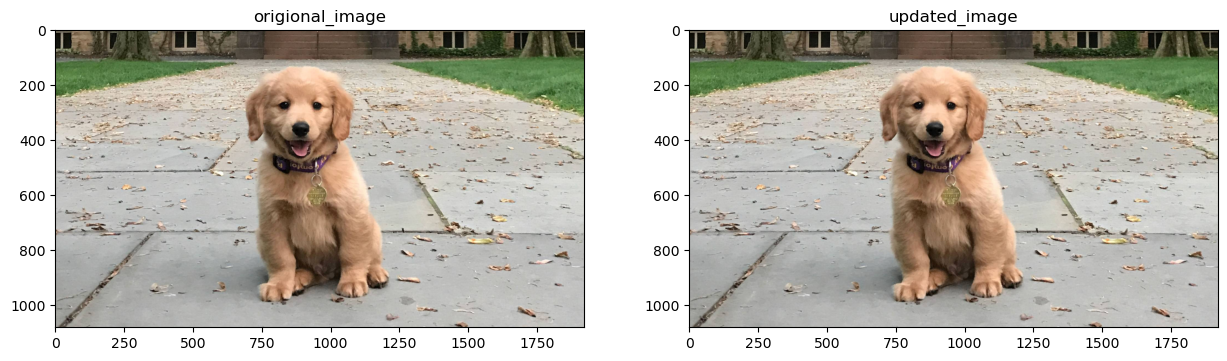

In [23]:
transformed_fn= keras.preprocessing.image.ImageDataGenerator(horizontal_flip= True)
transformes_array= transformed_fn.random_transform(dog_array)
transformed_image= keras.preprocessing.image.array_to_img(transformes_array)
plot_image(dog_image, transformed_image)

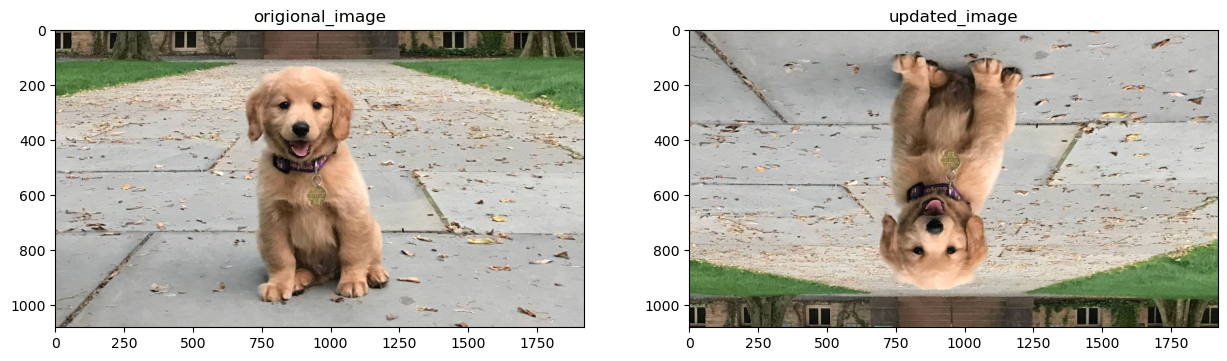

In [25]:
transformed_fn= keras.preprocessing.image.ImageDataGenerator(vertical_flip= True)
transformes_array= transformed_fn.random_transform(dog_array)
transformed_image= keras.preprocessing.image.array_to_img(transformes_array)
plot_image(dog_image, transformed_image)

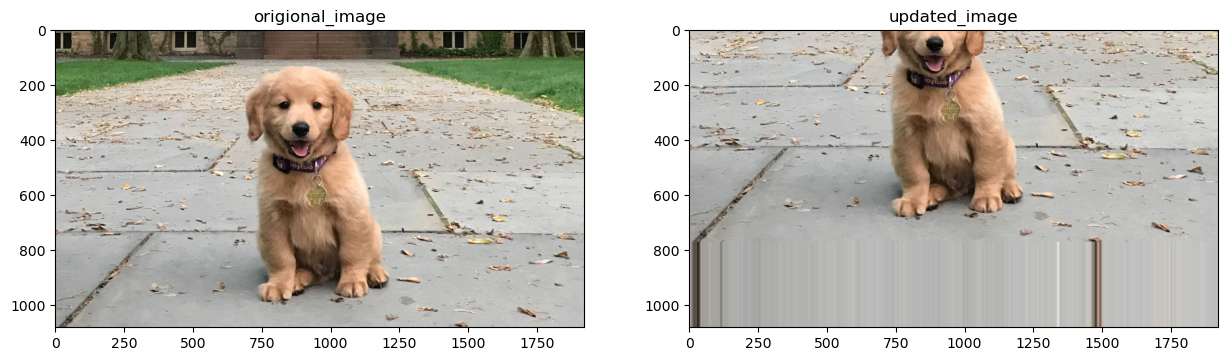

In [27]:
transformed_fn= keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.5)
transformes_array= transformed_fn.random_transform(dog_array)
transformed_image= keras.preprocessing.image.array_to_img(transformes_array)
plot_image(dog_image, transformed_image)

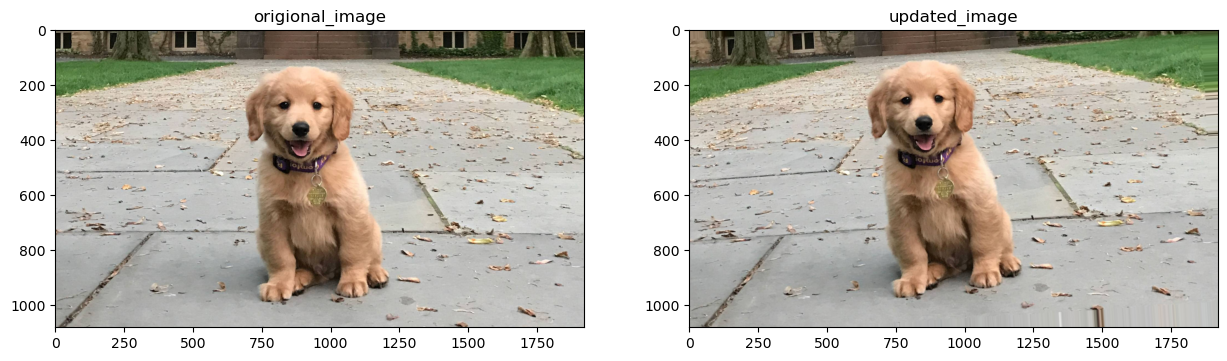

In [28]:
transformed_fn= keras.preprocessing.image.ImageDataGenerator(rotation_range=60)
transformes_array= transformed_fn.random_transform(dog_array)
transformed_image= keras.preprocessing.image.array_to_img(transformes_array)
plot_image(dog_image, transformed_image)

In [ ]:
augmentation = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.3,
                                  shear_range=0.5, zoom_range=0.2,
                                  horizontal_flip=True, vertical_flip=True, rescale=1./255)

# directory = '/content/sample_data'
# i = 0

# for batch in augmentation.flow(dog, batch_size=1, save_to_dir=directory,
#                                save_prefix='image',save_format='png'):
#   i +=1
#   if i >100:
#     break